[1 7]


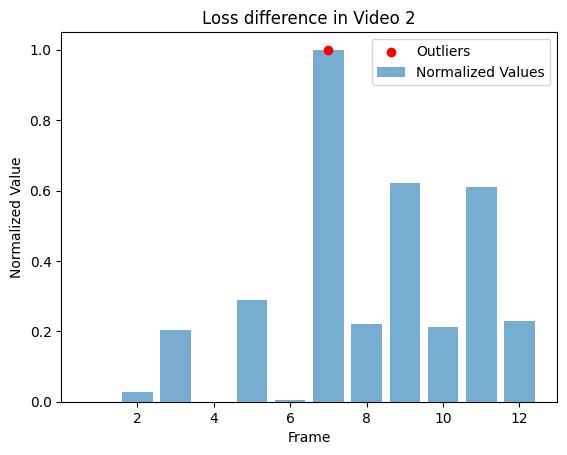

[  1  91 181]


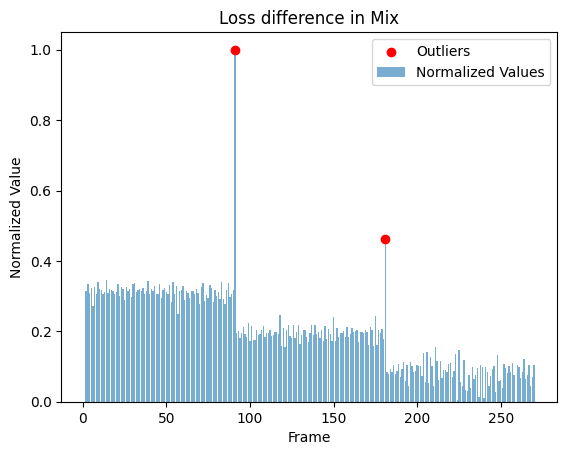

[1]


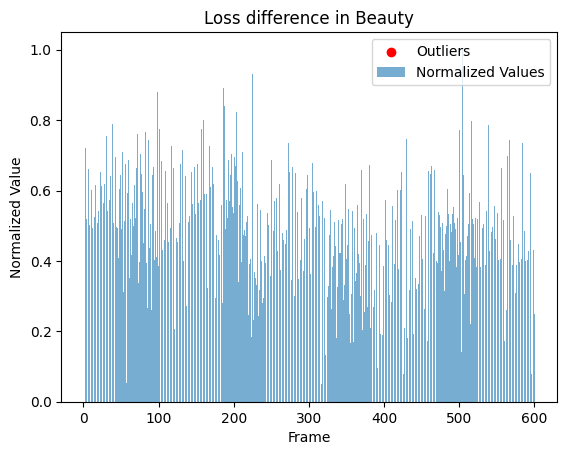

[1]


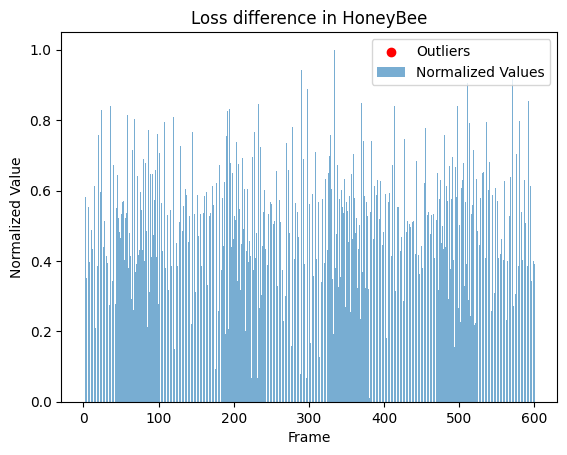

[1]


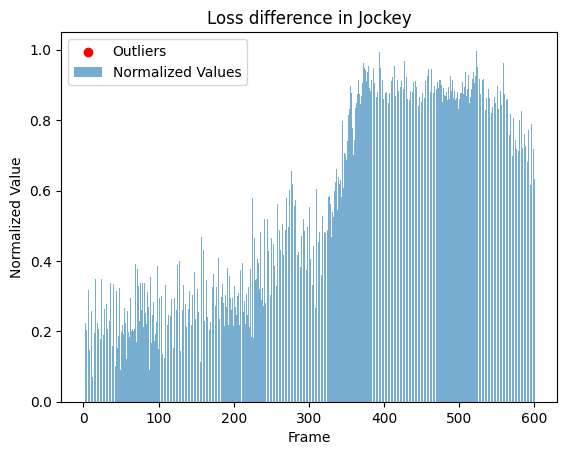

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.signal import find_peaks,detrend

# File paths and titles
file_info = {
    "V2_loss_list.txt": "Loss difference in Video 2",
    "Mix_loss_list.txt": "Loss difference in Mix",
    "Beauty_loss_list.txt": "Loss difference in Beauty",
    "HoneyBee_loss_list.txt": "Loss difference in HoneyBee",
    "Jockey_loss_list.txt": "Loss difference in Jockey",
}

# Function to read file and return frame numbers and Min-Max normalized values (keeping the first frame unchanged)
def read_file(file_path):
    frames = []
    values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(': ')
            if len(parts) == 2:
                frame = int(parts[0].replace("Frame ", ""))
                value = float(parts[1])
                frames.append(frame)
                values.append(value)
    return frames, values

def detect_outliers_mean_std(values, window_size=10, threshold=3):
    outliers = []
    for i in range(len(values)):
        # Define the window range
        start_idx = max(0, i - window_size)
        end_idx = min(len(values), i + window_size)
        
        # Calculate local mean and standard deviation
        local_mean = np.mean(values[start_idx:end_idx])
        local_std = np.std(values[start_idx:end_idx])
        # Check if the value exceeds the threshold
        if (values[i] - local_mean) > threshold * local_std:
            outliers.append(i)
        elif(values[i] > local_mean*threshold):
            outliers.append(i)
    return outliers

def detect_outliers_mean_std(values, window_size=10, threshold=3):
    outliers = []
    for i in range(len(values)):
        # Define the window range
        start_idx = max(0, i - window_size)
        end_idx = min(len(values), i + window_size)
        
        # Calculate local mean and standard deviation
        local_mean = np.mean(values[start_idx:end_idx])
        local_std = np.std(values[start_idx:end_idx])
        # Check if the value exceeds the threshold
        if (values[i] - local_mean) > threshold * local_std:
            outliers.append(i)
        elif(values[i] > local_mean*threshold):
            outliers.append(i)
    return outliers

# Plot each file's bar chart and fit data into a GMM
window_size=10
for file_path, title in file_info.items():
    frames, values = read_file(file_path)
    outlier_indices = detect_outliers_mean_std(values,window_size)
    K_f = [int(x + 1) for x in outlier_indices]
    K_f = np.insert(K_f, 0, 1)
    K_f = K_f.astype(int)
    print(K_f)
    K_frames = [frames[i] for i in outlier_indices]  # Get the frames corresponding to the outliers
    
    # Optional: Plotting the normalized values and highlighting outliers
    plt.figure()
    plt.bar(frames, values, label="Normalized Values", alpha=0.6)
    plt.scatter([frames[i] for i in outlier_indices], [values[i] for i in outlier_indices], color='red', label="Outliers")
    plt.title(title)
    plt.xlabel('Frame')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()
